## Fairbanks Different Panels comparison

In [190]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import requests

## First is get the True data and show some figures

In [191]:
# read the all the files 
onlyfiles = [f for f in listdir('Cleaned_data') if isfile(join('Cleaned_data', f))]
onlyfiles = [f for f in onlyfiles if f.endswith('xlsx')]
onlyfiles

['nortech_6.6kw_tracking_cleaned.xlsx',
 'uaf_fairbanks_cleaned.xlsx',
 'mastellar_solar_palmer_cleaned.xlsx',
 'spirit_of_alaska_fairbanks_johansen_cleaned.xlsx',
 'uaf_engineering_building_cleaned.xlsx',
 'FNSBSD-FMD_5.7kW_cleaned.xlsx',
 'spirit_of_alaska_fairbanks_gillam_cleaned.xlsx']

In [192]:
# pull the data from the Excel file that has been transportted manually to the identical format
nortech = pd.read_excel('Cleaned_data/nortech_6.6kw_tracking_cleaned.xlsx')
nortech = nortech.fillna("")
uaf = pd.read_excel('Cleaned_data/uaf_fairbanks_cleaned.xlsx')
uaf = uaf.fillna("")
mastellar = pd.read_excel('Cleaned_data/mastellar_solar_palmer_cleaned.xlsx')
mastellar = mastellar.fillna("")
johansen = pd.read_excel('Cleaned_data/spirit_of_alaska_fairbanks_johansen_cleaned.xlsx')
johansen = johansen.fillna("")
uaf_engineering = pd.read_excel('Cleaned_data/uaf_engineering_building_cleaned.xlsx')
uaf_engineering = uaf_engineering.fillna("")
ff = pd.read_excel('Cleaned_data/FNSBSD-FMD_5.7kW_cleaned.xlsx')
gillam = pd.read_excel('Cleaned_data/spirit_of_alaska_fairbanks_gillam_cleaned.xlsx')

In [193]:
#Ok, data added, we need to find a way to flip into having a month/time type format. 
#data_length = np.zeros(len(panel_data.index))
def add_time_col(dataframe):
    dataframe['Month_Year'] = ""
    for i in range(len(dataframe.index)):
        dataframe['Month_Year'][i] = str(dataframe['Month'][i]) + ', ' + str(dataframe['Year'][i])
    return(dataframe)

In [194]:
# create a function that can plot the annual Normalized Production
def annual_Norm(dataframe):
    lenth_list = list(range(12,len(dataframe.index)))
    annual_values = []
    month = []
    for i in range(len(lenth_list)):
        single_values = dataframe['Energy'][lenth_list[i]-12:lenth_list[i]].sum()/dataframe['DC Capacity'][0]
        #rolling_average.append(each_period)
        single_month = dataframe['Month_Year'][lenth_list[i]]
        annual_values.append(single_values)
        month.append(single_month)
    return(annual_values,month)

In [195]:
add_time_col(nortech)
add_time_col(uaf)
add_time_col(mastellar)
add_time_col(johansen)
add_time_col(uaf_engineering)
add_time_col(ff)
add_time_col(gillam)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Month,Energy,DC Capacity,Location,Month_Year
0,2013,November,4.793,3.5,Fairbanks,"November, 2013"
1,2013,December,0.089,NaN,NaN,"December, 2013"
2,2014,January,4.419,NaN,NaN,"January, 2014"
3,2014,February,5.407,NaN,NaN,"February, 2014"
4,2014,March,222.537,NaN,NaN,"March, 2014"
5,2014,April,467.142,NaN,NaN,"April, 2014"
6,2014,May,448.990,NaN,NaN,"May, 2014"
7,2014,June,379.679,NaN,NaN,"June, 2014"
8,2014,July,349.270,NaN,NaN,"July, 2014"
9,2014,August,370.637,NaN,NaN,"August, 2014"


In [196]:
n_annual_values,n_month = annual_Norm(nortech)
u_annual_values,u_month = annual_Norm(uaf)
m_annual_values,m_month = annual_Norm(mastellar)
#j_annual_values,j_month = annual_Norm(johansen)  This has the missing data which will cause problems
uaf_e_annual_values,uaf_e_month = annual_Norm(uaf_engineering)
f_annual_values,f_month = annual_Norm(ff)
g_annual_values,g_month = annual_Norm(gillam)

In [197]:
# merge all the data into a dataframe, so that we can plot 
new_n = pd.DataFrame({'Date':n_month,'nortech':n_annual_values})
new_u = pd.DataFrame({'Date':u_month,'uaf':u_annual_values})
new_m = pd.DataFrame({'Date':m_month,'mastellar':m_annual_values})
new_e = pd.DataFrame({'Date':uaf_e_month,'uaf_engineering':uaf_e_annual_values})
new_f = pd.DataFrame({'Date':f_month,'ff':f_annual_values})
new_g = pd.DataFrame({'Date':g_month,'gillam':g_annual_values})
result = pd.merge(new_f,new_n,on='Date',how='outer')
result = pd.merge(result,new_u,on='Date',how='outer')
result = pd.merge(result,new_m,on='Date',how='outer')
result = pd.merge(result,new_e,on='Date',how='outer')
result = pd.merge(result,new_g,on='Date',how='outer')
#result
result.fillna("")
result['Mean'] = result.mean(axis=1)
result

,Date,ff,nortech,uaf,mastellar,uaf_engineering,gillam,Mean
0,"October, 2011",679.035088,NaN,NaN,NaN,NaN,NaN,679.035088
1,"November, 2011",700.487719,NaN,NaN,NaN,NaN,NaN,700.487719
2,"December, 2011",701.610526,NaN,NaN,NaN,NaN,NaN,701.610526
3,"January, 2012",701.445614,NaN,NaN,NaN,NaN,NaN,701.445614
4,"February, 2012",696.663158,NaN,NaN,NaN,NaN,NaN,696.663158
5,"March, 2012",694.356140,NaN,NaN,NaN,NaN,NaN,694.356140
6,"April, 2012",662.954386,NaN,NaN,NaN,NaN,NaN,662.954386
7,"May, 2012",667.708772,NaN,NaN,NaN,NaN,NaN,667.708772
8,"June, 2012",652.491228,NaN,NaN,NaN,NaN,NaN,652.491228
9,"July, 2012",658.275439,NaN,NaN,NaN,NaN,NaN,658.275439


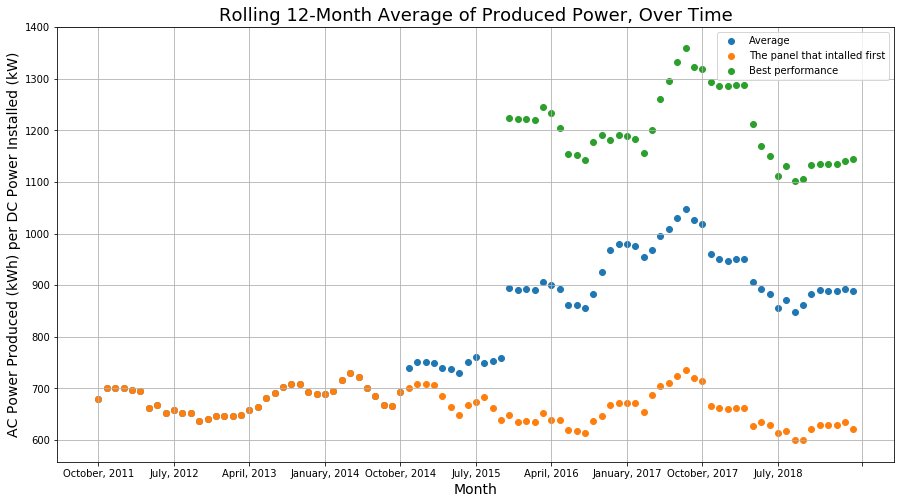

In [88]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.scatter(x = result['Date'],y = result['Mean'],label='Average')# This is the Average
#ax.scatter(x = u_month, y = u_annual_values)
ax.scatter(x = f_month, y = f_annual_values,label = 'The panel that intalled first')#This is the first panel
ax.scatter(x = n_month, y = n_annual_values,label='Best performance')# This is the best performance
#ax.scatter(x = m_month, y = m_annual_values)
#ax.scatter(x = uaf_e_month, y = uaf_e_annual_values)
tick_spacing = np.linspace(0, len(result.index),11, dtype = 'int')
ax.set_xticks(tick_spacing)
ax.set_title("Rolling 12-Month Average of Produced Power, Over Time", size = 18)
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("AC Power Produced (kWh) per DC Power Installed (kW)", size = 14)
ax.legend()
ax.grid()

## Then using the APIs to get the prediction data from the PV watts

In [198]:
nrel_long_tilt = []
tilts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
for i in range(len(tilts)):
    list_parameters = {"format": 'JSON', "api_key": "spJFj2l5ghY5jwk7dNfVYs3JHbpR6BOGHQNO8Y9Z", "system_capacity": 4, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": tilts[i], "azimuth": 180, "lat": 64.82, "lon": -147.87, "dataset": 'tmy2'}
    json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
    new_dataframe = pd.DataFrame(data = json_response['outputs'])
    nrel_long_tilt.append(new_dataframe)
print(nrel_long_tilt)

[    ac_monthly  poa_monthly  solrad_monthly  dc_monthly    ac_annual  \
0    18.987301     6.631680        0.213925   22.725245  3200.612793   
1    91.035156    27.050930        0.966105   98.086250  3200.612793   
2   272.492188    79.314285        2.558525  286.772400  3200.612793   
3   462.213074   135.295914        4.509864  483.805542  3200.612793   
4   519.547302   160.983749        5.193024  544.729736  3200.612793   
5   542.937012   171.665359        5.722178  569.626465  3200.612793   
6   511.257385   163.397552        5.270889  536.649658  3200.612793   
7   392.010071   122.991150        3.967456  412.263336  3200.612793   
8   233.482666    72.418793        2.413960  247.120529  3200.612793   
9   116.754417    35.631821        1.149414  125.749321  3200.612793   
10   34.762928    11.159619        0.371987   39.408035  3200.612793   
11    5.133535     2.533939        0.081740    7.657297  3200.612793   

    solrad_annual  capacity_factor  
0        2.701589        

In [199]:
long_annual_production = []
for i in range(len(tilts)):
    long_annual_production.append(nrel_long_tilt[i]['ac_annual'][2])
print(long_annual_production)

[3200.61279296875, 3385.348388671875, 3552.159912109375, 3697.927734375, 3821.869384765625, 3922.596923828125, 3999.150146484375, 4051.975341796875, 4081.388427734375, 4087.587646484375, 4070.912109375, 4031.055419921875, 3968.477783203125, 3883.735107421875]


Text(0.5, 1.0, 'Annual Production vs Tilt')

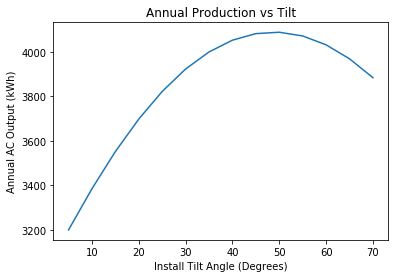

In [200]:
plt.plot(tilts, long_annual_production)
plt.xlabel("Install Tilt Angle (Degrees)")
plt.ylabel("Annual AC Output (kWh)")
plt.title("Annual Production vs Tilt")
#So from the graph ,we can see that the max production should be appoximately at 50 degree tilt, so we choose this on for now

In [201]:
# so we choose the the tilt at 50,which is the below one
nrel_long_tilt[9]

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor
0,79.867310,20.936970,0.675386,85.286110,4087.587646,3.377252,11.66549
1,221.018539,59.637424,2.129908,231.851715,4087.587646,3.377252,11.66549
2,459.006989,130.105988,4.196967,480.733307,4087.587646,3.377252,11.66549
3,571.288330,168.225449,5.607515,600.020569,4087.587646,3.377252,11.66549
4,546.803711,170.411606,5.497149,573.688721,4087.587646,3.377252,11.66549
5,531.402588,168.728546,5.624285,558.451782,4087.587646,3.377252,11.66549
6,523.032959,168.407486,5.432499,549.494629,4087.587646,3.377252,11.66549
7,446.199310,140.970047,4.547421,468.718170,4087.587646,3.377252,11.66549
8,333.627411,102.146194,3.404873,350.625366,4087.587646,3.377252,11.66549
9,223.574249,64.034477,2.065628,235.828796,4087.587646,3.377252,11.66549


In [202]:
# and there are a range from the finally prediction
TMY2_low = nrel_long_tilt[9]['ac_annual'][2]*0.95/4
TMY2_high = nrel_long_tilt[9]['ac_annual'][2]*1.05/4
result['TMY2_low'] = TMY2_low
result['TMY2_high'] = TMY2_high
plot_data = result[49:90].reset_index()

In [203]:
plot_data

,index,Date,ff,nortech,uaf,mastellar,uaf_engineering,gillam,Mean,TMY2_low,TMY2_high
0,49,"November, 2015",648.250877,1223.078788,901.983197,NaN,NaN,806.131143,894.861001,970.802066,1072.991757
1,50,"December, 2015",635.792982,1222.095455,911.428629,NaN,NaN,793.078857,890.598981,970.802066,1072.991757
2,51,"January, 2016",636.219298,1222.883333,916.748689,NaN,NaN,793.060571,892.227973,970.802066,1072.991757
3,52,"February, 2016",635.542105,1221.021212,910.208622,NaN,NaN,793.072857,889.961199,970.802066,1072.991757
4,53,"March, 2016",652.315789,1245.013636,932.740989,NaN,NaN,797.295429,906.841461,970.802066,1072.991757
5,54,"April, 2016",638.584211,1234.368182,913.669495,NaN,NaN,817.212857,900.958686,970.802066,1072.991757
6,55,"May, 2016",638.924561,1204.872727,915.571492,NaN,NaN,811.464571,892.708338,970.802066,1072.991757
7,56,"June, 2016",618.508772,1154.306061,893.184066,NaN,NaN,782.783714,862.195653,970.802066,1072.991757
8,57,"July, 2016",618.017544,1152.756061,900.583267,NaN,NaN,778.279429,862.409075,970.802066,1072.991757
9,58,"August, 2016",614.147368,1141.848485,892.298452,NaN,NaN,773.343143,855.409362,970.802066,1072.991757


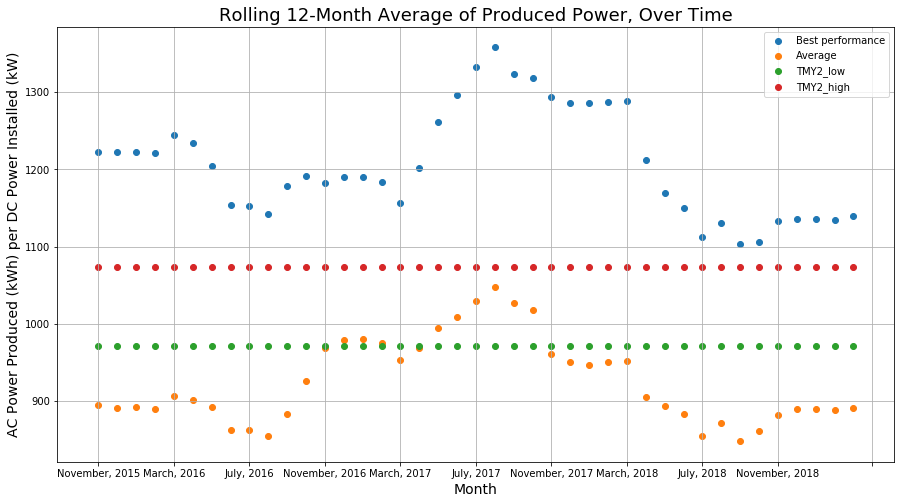

In [122]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.scatter(x = result['Date'][49:90], y = result['nortech'][49:90],label='Best performance')# This is the best performance
ax.scatter(x = result['Date'][49:90],y = result['Mean'][49:90],label='Average')# This is the Average
ax.scatter(x = result['Date'][49:90],y = result['TMY2_low'][49:90],label='TMY2_low')
ax.scatter(x = result['Date'][49:90],y = result['TMY2_high'][49:90],label ='TMY2_high')
#ax.scatter(x = u_month, y = u_annual_values)
#ax.scatter(x = f_month, y = f_annual_values,label = 'The panel that intalled first')#This is the first panel
#ax.scatter(x = m_month, y = m_annual_values)
#ax.scatter(x = uaf_e_month, y = uaf_e_annual_values)
tick_spacing = np.linspace(0, len(result.index[49:90]),11, dtype = 'int')
ax.set_xticks(tick_spacing)
ax.set_title("Rolling 12-Month Average of Produced Power, Over Time", size = 18)
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("AC Power Produced (kWh) per DC Power Installed (kW)", size = 14)
ax.legend()
ax.grid()

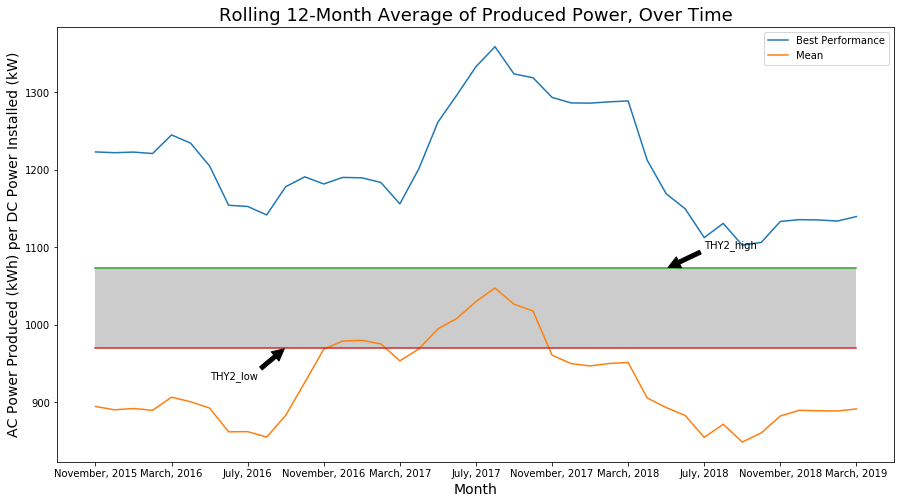

In [221]:
fig, ax = plt.subplots(figsize = (15, 8))
x = range(len(plot_data['Date']))
y1 = plot_data['nortech']
plt.plot(x ,y1)

y2 = plot_data['Mean']
plt.plot(x ,y2)


y3 = plot_data['TMY2_high']
plt.plot(x ,y3)


y4 = plot_data['TMY2_low']
plt.plot(x ,y4)


# #ax.plot(x=range(len(result['Date'][49:90])),y = result['Mean'][49:90],label='Average')
# #ax.plot(x=range(len(result['Date'][49:90])),y = result['TMY2_low'][49:90],label='TMY2_low') 
#ax.plot(x=range(len(result['Date'][49:90])),y = result['TMY2_high'][49:90],label ='TMY2_high')
tick_spacing = np.linspace(0, len(plot_data.index)-1,11, dtype = 'int')
Date_shown = []
for i in tick_spacing:
    Date_shown.append(plot_data['Date'][i])
plt.xticks(tick_spacing,Date_shown)
plt.annotate('THY2_high',xy=(30,1072.991757),xytext=(32,1100),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('THY2_low',xy=(10,970.802066),xytext=(6,930),arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Rolling 12-Month Average of Produced Power, Over Time", size = 18)
plt.xlabel("Month", size = 14)
plt.ylabel("AC Power Produced (kWh) per DC Power Installed (kW)", size = 14)
plt.legend(['Best Performance','Mean'])
plt.fill_between(x, y3, y4, facecolor = (0.8,0.8,0.8))
plt.show()


In [165]:
tick_spacing

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40])